In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

import mglearn

In [3]:
cancer = load_breast_cancer()
X, y = cancer['data'], cancer['target']
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, random_state=42)

In [6]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(1.0, 0.9370629370629371)

In [29]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=0)
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(0.9882629107981221, 0.951048951048951)

In [23]:
dtc = DecisionTreeClassifier(min_samples_leaf=3, random_state=0)
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(0.9788732394366197, 0.9370629370629371)

In [22]:
dtc = DecisionTreeClassifier(max_leaf_nodes=8, random_state=0)
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(0.9835680751173709, 0.951048951048951)

In [33]:
dtc = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=0)
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(0.9859154929577465, 0.958041958041958)

In [34]:
export_graphviz(dtc, out_file='cancer-tree.dot', 
                class_names=['악성', '양성'],
                feature_names=cancer['feature_names'],
                filled=True)

In [28]:
X_train.shape

(426, 30)

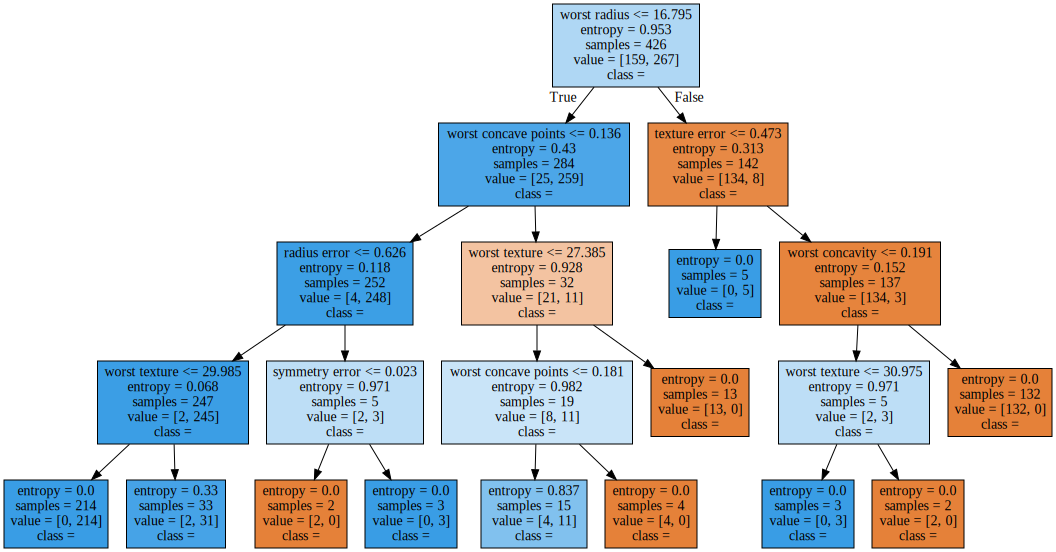

In [35]:
import graphviz

with open('cancer-tree.dot', encoding='utf-8') as f:
    tree_graph = graphviz.Source(f.read())
    display(tree_graph)

In [37]:
# 트리 형성에 미친 속성별 영향 정도
print(dtc.feature_importances_.sum())
dtc.feature_importances_

0.9999999999999998


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02093242, 0.06165377, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01268893, 0.        ,
       0.62610311, 0.05695529, 0.        , 0.        , 0.        ,
       0.        , 0.0417274 , 0.17993908, 0.        , 0.        ])

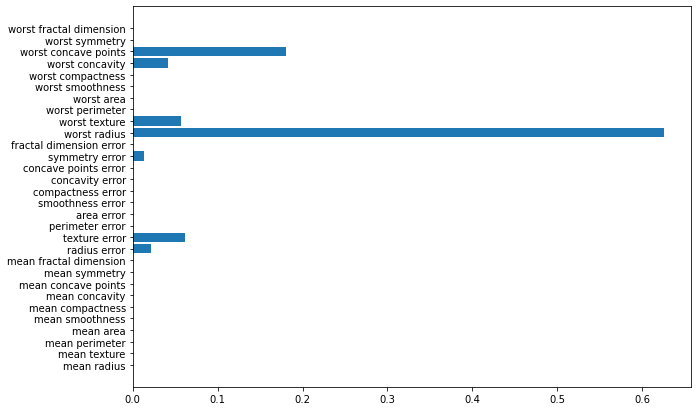

In [43]:
plt.figure(figsize=(10, 7))
plt.barh(range(X.shape[1]), dtc.feature_importances_)
plt.yticks(range(X.shape[1]), cancer['feature_names'])
plt.show()

In [62]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

dtr = DecisionTreeRegressor(max_depth=8, random_state=0)
dtr.fit(X_train, y_train)
print( dtr.score(X_train, y_train), dtr.score(X_test, y_test) )
print( dtr.predict(X_test[:3]), y_test[:3] )

0.9758475867215165 0.8490540360979767
[22.19591837 32.53333333 15.2       ] [23.6 32.4 13.6]


In [63]:
ram_prices = pd.read_csv('data-files/ram_price.csv')
ram_prices = ram_prices[["date", "price"]]
ram_prices.head(3)

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0


In [65]:
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

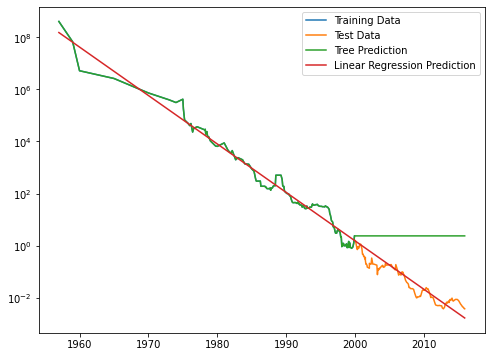

In [67]:
plt.figure(figsize=(8, 6))
plt.semilogy(data_train.date, data_train.price, label="Training Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_tree, label="Tree Prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear Regression Prediction")
plt.legend()
plt.show()